## Week 2
- try different text parameters, min_df
- test logistic regression parameters (penalty, C)
- try different count vectorizors, TF-IDF, ngrams
- multi class classification

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
GoEmo_df = pd.read_csv('GoEmotions_cleaned_ekman.csv')
GoEmo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56873 entries, 0 to 56872
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              56873 non-null  object
 1   text            56873 non-null  object
 2   subreddit       56873 non-null  object
 3   admiration      56873 non-null  int64 
 4   amusement       56873 non-null  int64 
 5   anger           56873 non-null  int64 
 6   annoyance       56873 non-null  int64 
 7   approval        56873 non-null  int64 
 8   caring          56873 non-null  int64 
 9   confusion       56873 non-null  int64 
 10  curiosity       56873 non-null  int64 
 11  desire          56873 non-null  int64 
 12  disappointment  56873 non-null  int64 
 13  disapproval     56873 non-null  int64 
 14  disgust         56873 non-null  int64 
 15  embarrassment   56873 non-null  int64 
 16  excitement      56873 non-null  int64 
 17  fear            56873 non-null  int64 
 18  gratit

In [17]:
# get just the postive columns along with text
positive_subset = GoEmo_df.iloc[:, [1, 31]].copy()

# store simplified data in X and y
X = positive_subset['text']
y = positive_subset['positive']

In [19]:
# splitting our data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [66]:
from sklearn.feature_extraction.text import CountVectorizer

# 1. Instantiate
bagofwords = CountVectorizer(stop_words="english", min_df = 5)
# 2. Fit
bagofwords.fit(X_train)

# 3. Transform
X_train_transformed = bagofwords.transform(X_train)
X_test_transformed = bagofwords.transform(X_test) 
X_train_transformed

<42654x6083 sparse matrix of type '<class 'numpy.int64'>'
	with 211265 stored elements in Compressed Sparse Row format>

In [67]:
from sklearn.linear_model import LogisticRegression

# Fitting a model
logreg = LogisticRegression()
logreg.fit(X_train_transformed, y_train)

# Training and test score
print(f"Train score: {logreg.score(X_train_transformed, y_train)}")
print(f"Test score: {logreg.score(X_test_transformed, y_test)}")

Train score: 0.8604820180991232
Test score: 0.8271327097545538


c:\Users\trann\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


With min_df = 5, the test score is the same as the baseline model (82.7%)
- train score decreased from 88.5% to 86%
- lets check different values of C

In [68]:
# test different values of C
c_test = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

train_score = []
test_score = []


for i in c_test:
    logreg = LogisticRegression(C = i)
    logreg.fit(X_train_transformed, y_train)
    train_score.append(logreg.score(X_train_transformed, y_train))
    test_score.append(logreg.score(X_test_transformed, y_test))

c:\Users\trann\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\trann\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [69]:
test_score

[0.6373865954005205,
 0.6660102679513327,
 0.7842323651452282,
 0.8243899008369083,
 0.8271327097545538,
 0.8096209297418947,
 0.8034320275687461]

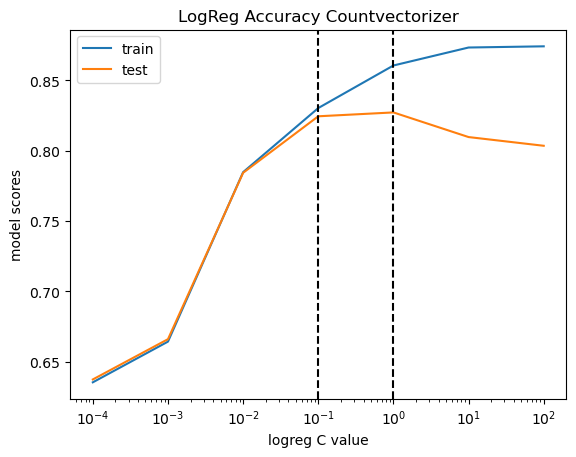

In [70]:
plt.figure()
plt.plot(c_test, train_score, label = 'train')
plt.plot(c_test, test_score, label = 'test')
plt.xscale("log")
plt.xlabel('logreg C value')
plt.ylabel('model scores')
plt.axvline(0.1, linestyle = '--', c = 'black')
plt.axvline(1, linestyle = '--', c = 'black')
plt.legend()
plt.title('LogReg Accuracy Countvectorizer')
plt.show()

C values of 0.1 and 1 have the best scores for test data
- c value at greater than 0.1 is approaching overfit
- test scores go down at c values greater than 0.1 aswell

# TF-IDF Vectorization

In [71]:
## TF-IDF vectorization

from sklearn.feature_extraction.text import TfidfVectorizer

# using our custom tokenizer in TfidfVectorizer
tfidf = TfidfVectorizer(stop_words="english")
tfidf.fit(X_train)

X_train_transformed = tfidf.transform(X_train)
X_test_transformed = tfidf.transform(X_test)

X_train_transformed.shape

(42654, 26107)

In [72]:
# Fitting a model
logreg = LogisticRegression()
logreg.fit(X_train_transformed, y_train)

# Training and test score
print(f"Train score: {logreg.score(X_train_transformed, y_train)}")
print(f"Test score: {logreg.score(X_test_transformed, y_test)}")

Train score: 0.8532376799362311
Test score: 0.8265700822842675


c:\Users\trann\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


c:\Users\trann\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


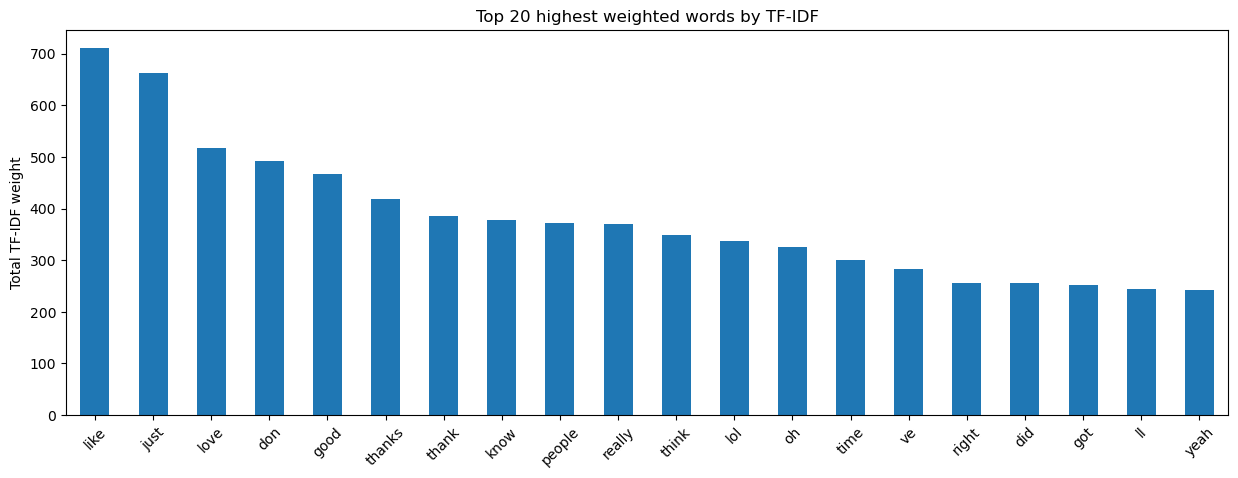

In [73]:
word_counts = pd.DataFrame(
    {"counts": X_train_transformed.toarray().sum(axis=0)},
    index=tfidf.get_feature_names()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 highest weighted words by TF-IDF")
plt.ylabel("Total TF-IDF weight")
plt.xticks(rotation=45)
plt.show()

In [74]:
# test different values of C
c_test = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

train_score = []
test_score = []


for i in c_test:
    logreg = LogisticRegression(C = i)
    logreg.fit(X_train_transformed, y_train)
    train_score.append(logreg.score(X_train_transformed, y_train))
    test_score.append(logreg.score(X_test_transformed, y_test))

c:\Users\trann\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\trann\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [75]:
test_score

[0.6373865954005205,
 0.6373865954005205,
 0.6830297489274914,
 0.7969618116604543,
 0.8265700822842675,
 0.8159504887826148,
 0.7883114143048034]

In [77]:
train_score

[0.6353448680076897,
 0.6353448680076897,
 0.6785530079242275,
 0.796595864397243,
 0.8532376799362311,
 0.9185773901627046,
 0.9360669573779716]

train = 85.3% accuracy at c=1 <br>
test = 82.6% accuracy at c=1


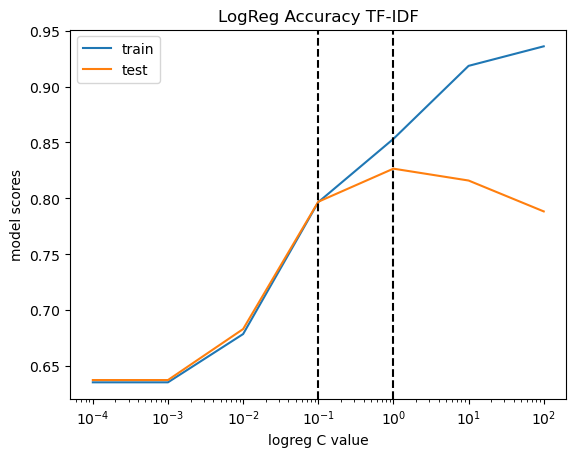

In [76]:
plt.figure()
plt.plot(c_test, train_score, label = 'train')
plt.plot(c_test, test_score, label = 'test')
plt.xscale("log")
plt.xlabel('logreg C value')
plt.ylabel('model scores')
plt.axvline(0.1, linestyle = '--', c = 'black')
plt.axvline(1, linestyle = '--', c = 'black')
plt.legend()
plt.title('LogReg Accuracy TF-IDF')
plt.show()

# N-grams

In [79]:
bagofwords = CountVectorizer(min_df=5,
                             ngram_range=(1, 3))
bagofwords.fit(X_train)

X_train_transformed = bagofwords.transform(X_train)
X_test_transformed = bagofwords.transform(X_test)

X_train_transformed.shape

(42654, 23113)

In [80]:
words = bagofwords.get_feature_names()
word_counts = X_train_transformed.toarray().sum(axis=0)
count_df = pd.DataFrame({'token': words, 'counts': word_counts})
count_df.head()

c:\Users\trann\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,token,counts
0,00,16
1,000,38
2,10,213
3,10 10,15
4,10 hours,5


In [81]:
#filter for bigrams

count_df[count_df['token'].str.split(' ').apply(len) == 2].sort_values('counts', ascending=False).head(20)

,token,counts
8465,in the,1377
22797,you re,1205
19066,this is,1170
12950,of the,1131
19493,to be,942
17189,thank you,885
5865,for the,824
9472,it was,680
13249,on the,670
8230,if you,636


In [82]:
# Fitting a model
logreg = LogisticRegression()
logreg.fit(X_train_transformed, y_train)

# Training and test score
print(f"Train score: {logreg.score(X_train_transformed, y_train)}")
print(f"Test score: {logreg.score(X_test_transformed, y_test)}")

Train score: 0.9300182866788578
Test score: 0.8279766509599831


c:\Users\trann\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


- test was slightly higher than base model 82.79% from 82.73%

# Multi class classifications
- positive/negative/neutral/ambiguous

In [ ]:
word_counts = pd.DataFrame(
    {"counts": X_train_transformed.toarray().sum(axis=0)},
    index=tfidf.get_feature_names()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 highest weighted words by TF-IDF")
plt.ylabel("Total TF-IDF weight")
plt.xticks(rotation=45)
plt.show()

In [3]:
sentiment_dummies = pd.DataFrame(GoEmo_df[['positive', 'neutral', 'negative', 'ambiguous']])

In [4]:
sentiment_dummies['Sentiment'] = sentiment_dummies.cumsum(axis=1).ne(1).sum(axis=1)

In [5]:
sentiment_dummies

,positive,neutral,negative,ambiguous,Sentiment
0,1,0,0,0,0
1,0,1,0,0,1
2,0,0,1,0,2
3,0,0,0,1,3
4,0,1,0,0,1
...,...,...,...,...,...
56868,0,0,0,1,3
56869,0,0,1,0,2
56870,0,1,0,0,1
56871,1,0,0,0,0


In [6]:
simple_data = pd.concat([GoEmo_df['text'], sentiment_dummies['Sentiment']], axis = 1).copy

In [7]:
text_df = GoEmo_df['text']
senti_df = sentiment_dummies['Sentiment']
simple_data = pd.concat([text_df, senti_df], axis = 1)

In [8]:
# store simplified data in X and y
X = simple_data['text']
y = simple_data['Sentiment']

In [9]:
# splitting our data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

# 1. Instantiate
bagofwords = CountVectorizer(stop_words="english",
                             min_df= 5)
# 2. Fit
bagofwords.fit(X_train)

# 3. Transform
X_train_transformed = bagofwords.transform(X_train)
X_test_transformed = bagofwords.transform(X_test) 
X_train_transformed

<42654x6083 sparse matrix of type '<class 'numpy.int64'>'
	with 211265 stored elements in Compressed Sparse Row format>

In [11]:
from sklearn.linear_model import LogisticRegression

# Fitting a model
logreg = LogisticRegression(C = 0.1)
logreg.fit(X_train_transformed, y_train)

# Training and test score
print(f"Train score: {logreg.score(X_train_transformed, y_train)}")
print(f"Test score: {logreg.score(X_test_transformed, y_test)}")

Train score: 0.6719182257232615
Test score: 0.6311976932273718


c:\Users\trann\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
from sklearn.tree import DecisionTreeClassifier
#Fit to the training data
DT_model = DecisionTreeClassifier(max_depth=20)
DT_model.fit(X_train_transformed, y_train)

print(f"The TRAIN classification accuracy is:  {DT_model.score(X_train_transformed,y_train)}")
print(f"The TEST classification accuracy is:  {DT_model.score(X_test_transformed,y_test)}")

The TRAIN classification accuracy is:  0.5475219205701692
The TEST classification accuracy is:  0.5389971165342148


In [13]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the model & fit it to our data
KNN_model = KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(X_train_transformed, y_train)

print(f"The TRAIN classification accuracy is:  {KNN_model.score(X_train_transformed,y_train)}")
print(f"The TEST classification accuracy is:  {KNN_model.score(X_test_transformed,y_test)}")

c:\Users\trann\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


The TRAIN classification accuracy is:  0.7133445866741689
The TEST classification accuracy is:  0.5302060623109923


c:\Users\trann\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [14]:
from sklearn.svm import LinearSVC

SVM_model = LinearSVC()
SVM_model.fit(X_train_transformed, y_train)

print(f"The TRAIN classification accuracy is:  {SVM_model.score(X_train_transformed,y_train)}")
print(f"The TEST classification accuracy is:  {SVM_model.score(X_test_transformed,y_test)}")

The TRAIN classification accuracy is:  0.7409387161813663
The TEST classification accuracy is:  0.6044728883887756
